# Sentiment Analysis


## Load data

In [2]:
import pandas as pd 

# Load the data
data = pd.read_csv(r"../resources/IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:

label_counts = data['sentiment'].value_counts()

label_ratios = label_counts / len(data) * 100 

print("Tỷ lệ các nhãn:")
print(label_ratios)

Tỷ lệ các nhãn:
sentiment
positive    50.0
negative    50.0
Name: count, dtype: float64


## Tiền xử lý dữ liệu

Ta sẽ làm sạch dữ liệu đã cho bằng cách:
- Xóa kí tự không phải chữ cái
- Chuyển đổi kí tự về chữ thường
- Tách từ: chia chuỗi thành danh sách các từ
- Loại bỏ stopword và stemming
    - Stemming là một kỹ thuật trong xử lý ngôn ngữ tự nhiên (NLP) nhằm giảm các từ về dạng gốc hoặc dạng cơ bản của chúng. Ví dụ:
    Từ "running", "runner" và "ran" đều có gốc là "run".
- Gép lại các từ thành chuỗi sau khi xử lý

In [6]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(data)):
    if isinstance(data["review"].iloc[i], str): 
        review = re.sub('[^a-zA-Z]', ' ', data["review"].iloc[i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
        review = [lemmatizer.lemmatize(word) for word in review]
        review = ' '.join(review)
        corpus.append(review)
    else:
        corpus.append('')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# Cho các text đã xử lý sang một cột mới trong data
data['Processed_Text'] = corpus

### Chia tập dữ liệu

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Chuyển dữ liệu sang đặc trưng số sử dụng TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2)) 

In [14]:
# Chia data thành các tập train và test
X = tfidf.fit_transform(data['Processed_Text']).toarray()
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Các mô hình

### 1. Naive bayes

#### Sử dụng mô hình MultinomialNB, BernoulliNB, GaussianNB

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Danh sách các mô hình
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

# Huấn luyện và đánh giá từng mô hình
for model_name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Tính độ chính xác và báo cáo phân loại
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # In kết quả
    print(f'--- {model_name} ---')
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(report)
    print('\n' + '-' * 30 + '\n')

--- GaussianNB ---
Accuracy: 0.8256
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.82      0.83      5044
    positive       0.82      0.83      0.82      4956

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000


------------------------------

--- MultinomialNB ---
Accuracy: 0.8603
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.84      0.86      5044
    positive       0.85      0.88      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


------------------------------

--- BernoulliNB ---
Accuracy: 0.8622
Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.84      0.86 

##### Điều chỉnh siêu tham số cho mô hình Gaussian Naive Bayes
Trong mô hình Gaussian Naive Bayes của scikit-learn, giá trị mặc định cho siêu tham số `var_smoothing` là $10^{-9}$. Ở đây ta sẽ thử khảo sát độ chính xác mô hình cho các giá trị khác nhau của siêu tham số này. Ta thấy giá trị tốt nhất là $10^{-2}$ tuy nhiên độ chính xác đạt được chênh lệch không đáng kể với giá trị mặc định.


Best Parameters: {'var_smoothing': 0.01}
Accuracy: 0.8348
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.83      0.84      5044
    positive       0.83      0.84      0.83      4956

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



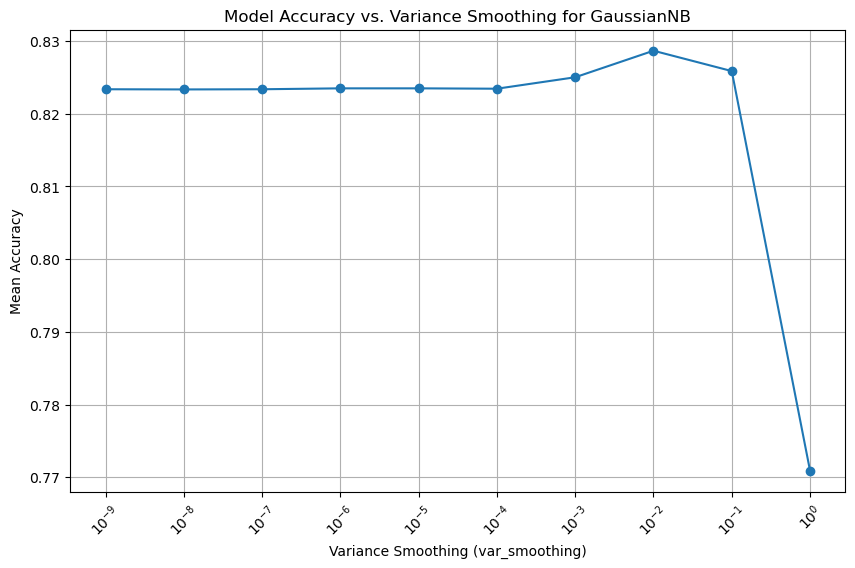

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

parameters = {'var_smoothing': np.logspace(0, -9, num=10)}  # Các giá trị var_smoothing

gnb = GaussianNB()

clf = GridSearchCV(gnb, parameters, cv=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Parameters: {clf.best_params_}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

mean_accuracy = clf.cv_results_['mean_test_score'] 
var_smoothing_values = parameters['var_smoothing']  

plt.figure(figsize=(10, 6))
plt.plot(var_smoothing_values, mean_accuracy, marker='o')
plt.title('Model Accuracy vs. Variance Smoothing for GaussianNB')
plt.xlabel('Variance Smoothing (var_smoothing)')
plt.ylabel('Mean Accuracy')
plt.xscale('log')  
plt.xticks(var_smoothing_values, rotation=45)  
plt.grid()
plt.show()

### 2. LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8919
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      5044
    positive       0.88      0.91      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### 3. Test thử Random Forest

In [ ]:
# Không nên thử, tí thì cháy máy :) 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the Random Forest model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


KeyboardInterrupt: 